


# <font color='grey'> Prevendo clientes com potencial de conceder cartão de crédito</font>





## **Contexto de Negócio**

As instituições financeiras tem utilizado amplamente a análise de dados em suas operações. Dentro desse contexto, o risco de crédito constituem um dos grandes desafios para as empresas visto que trata da possibilidade de perdas financeiras devido a inadimplência por parte da carteira de clientes.

Dessa forma, analisaremos uma base de dados  com a concessão de um cartão de crédito para um supermercado, considerando as principais características desses clientes.

Portanto, o objetivo dessa análise é entregar um modelo de ML que possa classificar se os clientes estão aptos ou não a esse produto.



![](https://brasil.gs/wp-content/uploads/2022/03/GS-PostFEV-03-capablog-copiar.jpg)

## **Importando as Bibliotecas**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

In [66]:
df_loan = pd.read_excel('base_case_modelagem2.xlsx', sheet_name = 'Base de Treino')

##  Análise Exploratória e Descritiva dos Dados

Abaixo segue uma análise explorátoria dos dados. Basicamente, foi utlizado a biblioteca dataprep para checarmos as distribuições das variáveis. É criado um report bem intuitivo de todo conjunto de dados.

In [3]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35572 entries, 0 to 35571
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          35572 non-null  int64  
 1   PERFORMANCE (var resposta)  18745 non-null  float64
 2   V1                          34922 non-null  float64
 3   V2                          33182 non-null  object 
 4   V3                          33861 non-null  float64
 5   V4                          35540 non-null  float64
 6   V5                          34922 non-null  float64
 7   V6                          34922 non-null  float64
 8   V7                          34922 non-null  float64
 9   V8                          14144 non-null  float64
 10  V9                          32909 non-null  float64
 11  V10                         35540 non-null  float64
 12  V11                         35540 non-null  float64
 13  V12                         355

In [4]:
#Checando os primeiros registros do dataset

df_loan.head(5)

,ID,PERFORMANCE (var resposta),V1,V2,V3,V4,V5,V6,V7,V8,...,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
0,1,0.0,563.101990,B,12.0,6.0,1264.109985,1.67665,944.123108,0.03750,...,10.0,353.0,Fiel,Fiel,Fiel,0.0,1.0,Premium,0.74687,49
1,9,NaN,190.110001,M,365.0,0.0,0.000000,0.00000,0.000000,0.02994,...,92.0,349.0,Inativo,Inativo,Inativo,1.0,1.0,Inativo,0.00000,55
2,52,0.0,283.477509,G,15.0,2.0,408.279999,1.12000,317.494812,NaN,...,72.0,173.0,Inativo,Ausente,Ocasional,0.0,1.0,Inativo,0.77764,46
3,63,NaN,80.919998,G,83.0,0.0,0.000000,0.00000,0.000000,NaN,...,92.0,118.0,Inativo,Inativo,Novo,-1.0,1.0,Inativo,0.00000,59
4,105,0.0,492.380005,M,365.0,1.0,0.000000,0.00000,0.000000,NaN,...,65.0,318.0,Inativo,Ausente,Inativo,-1.0,1.0,Inativo,0.00000,64


In [5]:
df_loan.describe()

,ID,PERFORMANCE (var resposta),V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,V15,V16,V18,V19
count,35572.000000,18745.000000,34922.000000,33861.000000,35540.000000,34922.000000,34922.000000,34922.000000,14144.000000,32909.000000,35540.000000,35540.000000,34922.000000,35447.000000,34922.000000,35572.000000
mean,337615.796666,0.199467,245.632589,254.491893,5.167276,536.066752,1.855144,335.295699,0.055143,0.068210,38.197777,281.386860,0.125594,0.943775,0.418571,47.616665
std,195957.367514,0.399610,272.205288,159.927435,7.586663,774.517872,2.484477,486.231000,0.079842,0.106627,36.958412,126.682322,0.626102,0.230359,0.358214,35.555455
min,1.000000,0.000000,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.002420,-0.057570,0.000000,0.000000,-1.000000,0.000000,0.000000,-5943.000000
25%,169313.750000,0.000000,72.423143,50.000000,0.000000,0.000000,0.000000,0.000000,0.003858,-0.033890,5.000000,193.000000,0.000000,1.000000,0.000000,36.000000
50%,336772.500000,0.000000,152.281250,365.000000,2.000000,308.779999,1.195120,168.661179,0.023450,0.054650,20.000000,325.000000,0.000000,1.000000,0.481060,47.000000
75%,508681.500000,0.000000,323.497498,365.000000,7.000000,814.459991,2.512820,501.991646,0.069753,0.162070,92.000000,355.000000,1.000000,1.000000,0.669063,59.000000
max,676660.000000,1.000000,5716.069824,365.000000,84.000000,25991.000000,26.000000,11353.650391,0.392630,0.329520,92.000000,536.000000,1.000000,1.000000,2.157450,110.000000


<AxesSubplot:>

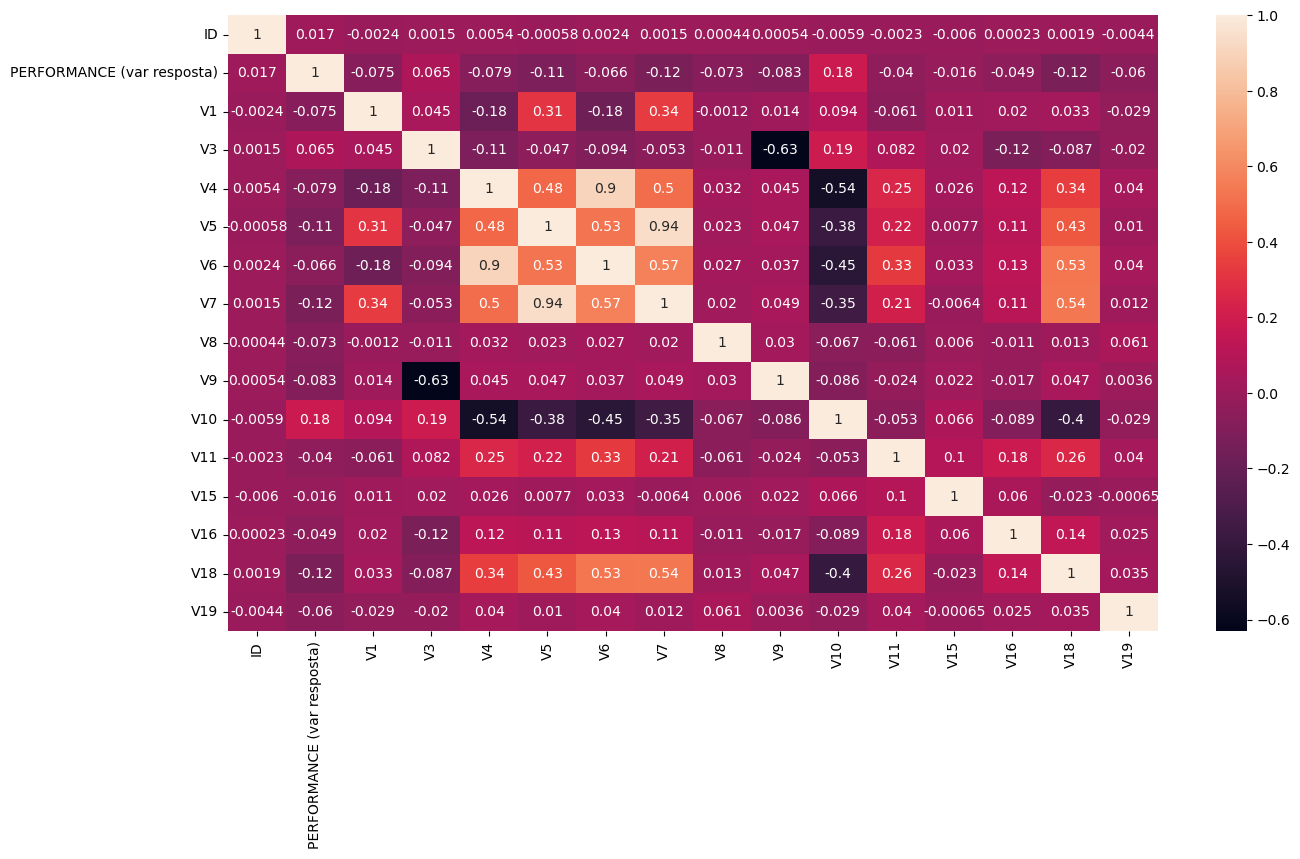

In [7]:
#Analise de Correlacao das Variáveis
plt.figure (figsize = (15,8))
sns.heatmap(df_loan.corr(), annot = True)

# 3° Pré-Processamento do Dataset

Primeiramente é necessário importar o módulo. Após essa etapa incializamos o pycaret que realizará algumas tarefas de pré-processamento.

In [67]:
#Checando a proporcão da variável target.
df_loan.groupby('PERFORMANCE (var resposta)').size()

PERFORMANCE (var resposta)
0.0    15006
1.0     3739
dtype: int64

Distribuição da variável:
0.0    15006
1.0     3739
Name: PERFORMANCE (var resposta), dtype: int64


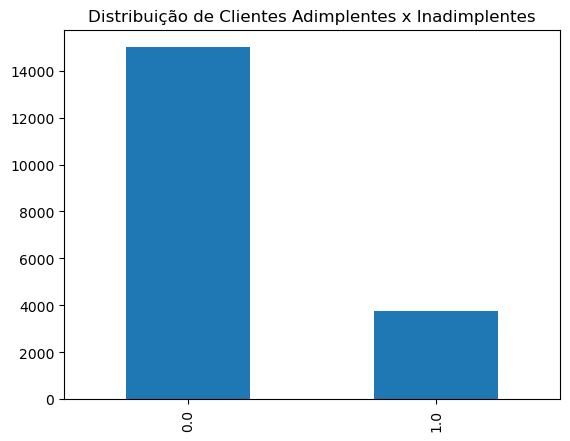

In [68]:
df_loan['PERFORMANCE (var resposta)'].value_counts().plot.bar(title = 'Distribuição de Clientes Adimplentes x Inadimplentes')

print('Distribuição da variável:')
print(df_loan['PERFORMANCE (var resposta)'].value_counts())


Conforme gráfico acima, a quantidade clientes classificados como Adimplentes (Valor Zero) é bem maior que clientes Inadimplentes ( Valor Um). Para a construcão de um modelo de Machine Learning para classificação, que é nosso caso, a consequência pode ser uma forte têndencia a **alarmes falsos**.

In [69]:
for feature in df_loan.columns:
    print("{}\t {:.1f}% null values".format(feature, (df_loan[feature].isnull().sum()/ len(df_loan))*100))

ID	 0.0% null values
PERFORMANCE (var resposta)	 47.3% null values
V1	 1.8% null values
V2	 6.7% null values
V3	 4.8% null values
V4	 0.1% null values
V5	 1.8% null values
V6	 1.8% null values
V7	 1.8% null values
V8	 60.2% null values
V9	 7.5% null values
V10	 0.1% null values
V11	 0.1% null values
V12	 0.1% null values
V13	 2.3% null values
V14	 6.6% null values
V15	 1.8% null values
V16	 0.4% null values
V17	 0.1% null values
V18	 1.8% null values
V19	 0.0% null values


Em relacao aos valores nulos, a variàvel V8 apresentou um alto percentual de valores. Isso pode vir a impactar na análise visto que foi uma quantidade grande. Sendo assim, seria interessante analisar a ausência desses valores visto que pode ser uma variável importante na criacao do modelo de crédito.

In [70]:
df_loan.dtypes

ID                              int64
PERFORMANCE (var resposta)    float64
V1                            float64
V2                             object
V3                            float64
V4                            float64
V5                            float64
V6                            float64
V7                            float64
V8                            float64
V9                            float64
V10                           float64
V11                           float64
V12                            object
V13                            object
V14                            object
V15                           float64
V16                           float64
V17                            object
V18                           float64
V19                             int64
dtype: object

In [71]:
#Remover valores NA da coluna Performance

df_loan = df_loan.dropna(subset=['PERFORMANCE (var resposta)','V2','V12','V13','V14','V17'])

In [72]:
# Alterando o nome da coluna target
df_loan = df_loan.rename(columns = {'PERFORMANCE (var resposta)':'Target'})

In [73]:
for feature in df_loan.columns:
    print("{}\t {:.1f}% null values".format(feature, (df_loan[feature].isnull().sum()/ len(df_loan))*100))

ID	 0.0% null values
Target	 0.0% null values
V1	 1.3% null values
V2	 0.0% null values
V3	 0.5% null values
V4	 0.0% null values
V5	 1.3% null values
V6	 1.3% null values
V7	 1.3% null values
V8	 56.2% null values
V9	 0.6% null values
V10	 0.0% null values
V11	 0.0% null values
V12	 0.0% null values
V13	 0.0% null values
V14	 0.0% null values
V15	 1.3% null values
V16	 0.0% null values
V17	 0.0% null values
V18	 1.3% null values
V19	 0.0% null values


In [74]:
df_loan.head(5)

,ID,Target,V1,V2,V3,V4,V5,V6,V7,V8,...,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
0,1,0.0,563.101990,B,12.0,6.0,1264.109985,1.67665,944.123108,0.0375,...,10.0,353.0,Fiel,Fiel,Fiel,0.0,1.0,Premium,0.74687,49
2,52,0.0,283.477509,G,15.0,2.0,408.279999,1.12000,317.494812,NaN,...,72.0,173.0,Inativo,Ausente,Ocasional,0.0,1.0,Inativo,0.77764,46
4,105,0.0,492.380005,M,365.0,1.0,0.000000,0.00000,0.000000,NaN,...,65.0,318.0,Inativo,Ausente,Inativo,-1.0,1.0,Inativo,0.00000,64
7,156,0.0,92.010002,M,365.0,0.0,0.000000,0.00000,0.000000,0.0000,...,92.0,332.0,Inativo,Inativo,Inativo,0.0,1.0,Inativo,0.00000,26
8,157,0.0,235.660004,W,365.0,0.0,0.000000,0.00000,0.000000,NaN,...,92.0,157.0,Inativo,Inativo,Inativo,1.0,1.0,Inativo,0.00000,75


In [75]:
# Separar as colunas numéricas

colunas_numericas = df_loan.select_dtypes(include=[int, float]).columns
col_target ='Target'
colunas_numericas_sem_target = colunas_numericas.drop(col_target)

# Substituir valores zero por NaN nas colunas numéricas (exceto a coluna target)
df_loan[colunas_numericas_sem_target] = df_loan[colunas_numericas_sem_target].replace(0, pd.NA)


# Imputar a média nas colunas numéricas (exceto a coluna target) com valores ausentes (NaN) e vazios
for col in colunas_numericas_sem_target:
    media_col = df_loan[col].mean(skipna=True)
    df_loan[col].fillna(media_col, inplace = True)


In [76]:
for feature in df_loan.columns:
    print("{}\t {:.1f}% null values".format(feature, (df_loan[feature].isnull().sum()/ len(df_loan))*100))


ID	 0.0% null values
Target	 0.0% null values
V1	 0.0% null values
V2	 0.0% null values
V3	 0.0% null values
V4	 0.0% null values
V5	 0.0% null values
V6	 0.0% null values
V7	 0.0% null values
V8	 0.0% null values
V9	 0.0% null values
V10	 0.0% null values
V11	 0.0% null values
V12	 0.0% null values
V13	 0.0% null values
V14	 0.0% null values
V15	 0.0% null values
V16	 0.0% null values
V17	 0.0% null values
V18	 0.0% null values
V19	 0.0% null values


In [77]:
df_loan.head(5)

,ID,Target,V1,V2,V3,V4,V5,V6,V7,V8,...,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
0,1,0.0,563.101990,B,12.0,6.000000,1264.109985,1.676650,944.123108,0.037500,...,10.0,353.0,Fiel,Fiel,Fiel,0.375561,1.0,Premium,0.74687,49
2,52,0.0,283.477509,G,15.0,2.000000,408.279999,1.120000,317.494812,0.056018,...,72.0,173.0,Inativo,Ausente,Ocasional,0.375561,1.0,Inativo,0.77764,46
4,105,0.0,492.380005,M,365.0,1.000000,875.143748,2.490173,542.602315,0.056018,...,65.0,318.0,Inativo,Ausente,Inativo,-1.000000,1.0,Inativo,0.63716,64
7,156,0.0,92.010002,M,365.0,6.361429,875.143748,2.490173,542.602315,0.056018,...,92.0,332.0,Inativo,Inativo,Inativo,0.375561,1.0,Inativo,0.63716,26
8,157,0.0,235.660004,W,365.0,6.361429,875.143748,2.490173,542.602315,0.056018,...,92.0,157.0,Inativo,Inativo,Inativo,1.000000,1.0,Inativo,0.63716,75


In [35]:
df = df_loan.copy()

df = df.drop(['ID'], axis =1)

In [36]:
#Aplicar o one-hot encoding nas variaveis 'V2', 'V12','V13','V14','V17'

df = pd.get_dummies (df, columns = ['V2', 'V12','V13','V14','V17'])

In [37]:
df.columns.values

array(['Target', 'V1', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V15', 'V16', 'V18', 'V19', 'V2_B', 'V2_G', 'V2_M', 'V2_W',
       'V12_Ausente', 'V12_Fiel', 'V12_Inativo', 'V12_Novo',
       'V12_Ocasional', 'V13_Ausente', 'V13_Fiel', 'V13_Inativo',
       'V13_Novo', 'V13_Ocasional', 'V14_Ausente', 'V14_Fiel',
       'V14_Inativo', 'V14_Novo', 'V14_Ocasional', 'V17_Ativo',
       'V17_Ausente', 'V17_Basico', 'V17_Conveniencia', 'V17_Economico',
       'V17_Inativo', 'V17_Novo', 'V17_Premium'], dtype=object)

In [38]:
df.head(5)

,Target,V1,V3,V4,V5,V6,V7,V8,V9,V10,...,V14_Novo,V14_Ocasional,V17_Ativo,V17_Ausente,V17_Basico,V17_Conveniencia,V17_Economico,V17_Inativo,V17_Novo,V17_Premium
0,0.0,563.101990,12.0,6.000000,1264.109985,1.676650,944.123108,0.037500,0.19642,10.0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,283.477509,15.0,2.000000,408.279999,1.120000,317.494812,0.056018,0.13218,72.0,...,0,1,0,0,0,0,0,1,0,0
4,0.0,492.380005,365.0,1.000000,875.143748,2.490173,542.602315,0.056018,0.00706,65.0,...,0,0,0,0,0,0,0,1,0,0
7,0.0,92.010002,365.0,6.361429,875.143748,2.490173,542.602315,0.056018,0.00400,92.0,...,0,0,0,0,0,0,0,1,0,0
8,0.0,235.660004,365.0,6.361429,875.143748,2.490173,542.602315,0.056018,-0.02804,92.0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
#Checando a proporcão da variável target.
df.groupby('Target').size()

Target
0.0    13280
1.0     3119
dtype: int64

In [40]:
#Checando se os valores Nulos foram devidamente substituídos
for feature in df.columns:
    print("{}\t {:.1f}% null values".format(feature, (df[feature].isnull().sum()/ len(df))*100))

Target	 0.0% null values
V1	 0.0% null values
V3	 0.0% null values
V4	 0.0% null values
V5	 0.0% null values
V6	 0.0% null values
V7	 0.0% null values
V8	 0.0% null values
V9	 0.0% null values
V10	 0.0% null values
V11	 0.0% null values
V15	 0.0% null values
V16	 0.0% null values
V18	 0.0% null values
V19	 0.0% null values
V2_B	 0.0% null values
V2_G	 0.0% null values
V2_M	 0.0% null values
V2_W	 0.0% null values
V12_Ausente	 0.0% null values
V12_Fiel	 0.0% null values
V12_Inativo	 0.0% null values
V12_Novo	 0.0% null values
V12_Ocasional	 0.0% null values
V13_Ausente	 0.0% null values
V13_Fiel	 0.0% null values
V13_Inativo	 0.0% null values
V13_Novo	 0.0% null values
V13_Ocasional	 0.0% null values
V14_Ausente	 0.0% null values
V14_Fiel	 0.0% null values
V14_Inativo	 0.0% null values
V14_Novo	 0.0% null values
V14_Ocasional	 0.0% null values
V17_Ativo	 0.0% null values
V17_Ausente	 0.0% null values
V17_Basico	 0.0% null values
V17_Conveniencia	 0.0% null values
V17_Economico	 0.0% nul

In [41]:
# Separa as features (X) e o target (y)

X = df.drop(columns=['Target'])
y = df['Target']

### Balanceando as classes com SMOTE

Para imputar as variáveis e construcao dos modelos, com o objetivo de reduzir o impacto para nossa classificação de crédito visto que a variávek Target (1) objeto desse estudo está desbalanceada, inclui-se o parãmetro **SMOTE** para otimizarmos o desempenho do modelo. Abaixo testaremos uma série de Algoritmos.

In [42]:
# Aplica o SMOTE para balancear as classes

smote = SMOTE(sampling_strategy = 'auto',random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [43]:
# Converter o resultado de volta para DataFrame (opcional)
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Target'] = y_resampled


In [44]:
df_resampled.head(5)

,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V14_Ocasional,V17_Ativo,V17_Ausente,V17_Basico,V17_Conveniencia,V17_Economico,V17_Inativo,V17_Novo,V17_Premium,Target
0,563.101990,12.0,6.000000,1264.109985,1.676650,944.123108,0.037500,0.19642,10.0,353.0,...,0,0,0,0,0,0,0,0,1,0.0
1,283.477509,15.0,2.000000,408.279999,1.120000,317.494812,0.056018,0.13218,72.0,173.0,...,1,0,0,0,0,0,1,0,0,0.0
2,492.380005,365.0,1.000000,875.143748,2.490173,542.602315,0.056018,0.00706,65.0,318.0,...,0,0,0,0,0,0,1,0,0,0.0
3,92.010002,365.0,6.361429,875.143748,2.490173,542.602315,0.056018,0.00400,92.0,332.0,...,0,0,0,0,0,0,1,0,0,0.0
4,235.660004,365.0,6.361429,875.143748,2.490173,542.602315,0.056018,-0.02804,92.0,157.0,...,0,0,0,0,0,0,1,0,0,0.0


Distribuição da variável:
0.0    13280
1.0    13280
Name: Target, dtype: int64


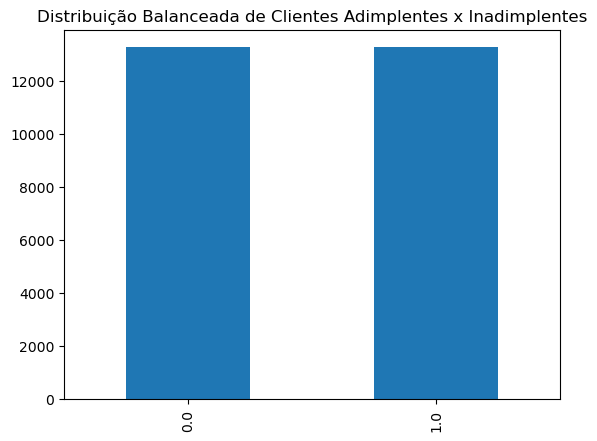

In [30]:
df_resampled['Target'].value_counts().plot.bar(title = 'Distribuição Balanceada de Clientes Adimplentes x Inadimplentes')

print('Distribuição da variável:')
print(df_resampled['Target'].value_counts())

##  Construção dos Modelos

In [45]:
# Separando X e y

Y = df_resampled['Target']
x = df_resampled.drop('Target', axis =1)


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.35, random_state =0)


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

reg_log = LogisticRegression()
reg_log.fit (X_train, y_train)

LogisticRegression()

## Acurácia do Modelo base Reg. Logistica

In [48]:
from sklearn.metrics import accuracy_score
print('Acurácia do Modelo de Regressao Logistica: {:.3f}'.format(accuracy_score(y_test, reg_log.predict(X_test))))

Acurácia do Modelo de Regressao Logistica: 0.812


## Acurácia do Modelo Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Acurácia do Modelo Random Forest: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Acurácia do Modelo Random Forest: 0.808


## Acurácia do Modelo Xgboost

In [50]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=5000, learning_rate=0.8, max_depth=7)
xgb.fit(X_train, y_train)
print('Acurácia do Modelo XGboost: {:.3f}'.format(accuracy_score(y_test, xgb.predict(X_test))))

Acurácia do Modelo XGboost: 0.779


 Avaliação do Modelo Final

In [37]:
# Avaliação com o report de Classificacao

from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89      4659
         1.0       0.47      0.09      0.15      1081

    accuracy                           0.81      5740
   macro avg       0.64      0.53      0.52      5740
weighted avg       0.75      0.81      0.75      5740



Text(0.5, 1.0, 'Modelo Random Forest')

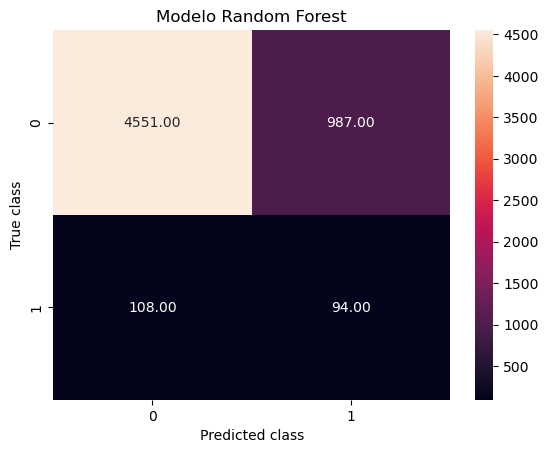

In [38]:
# Avaliação com a Confusion Matrix

y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf_conf_matrix = metrics.confusion_matrix(y_pred, y_test)
sns.heatmap(rf_conf_matrix, annot= True, fmt='.2f',xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Modelo Random Forest')

In [39]:
print(classification_report(y_test, reg_log.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90      4659
         1.0       0.59      0.01      0.02      1081

    accuracy                           0.81      5740
   macro avg       0.70      0.50      0.46      5740
weighted avg       0.77      0.81      0.73      5740



Text(0.5, 1.0, 'Modelo Regressão Logistica')

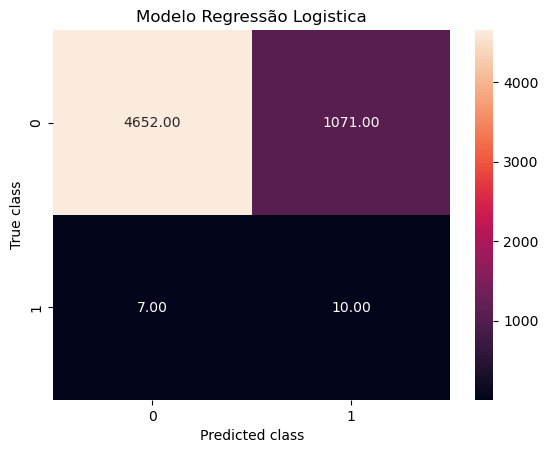

In [40]:
reg_log_y_pred = reg_log.predict(X_test)

reg_conf_matrix = metrics.confusion_matrix(reg_log_y_pred, y_test)
sns.heatmap(reg_conf_matrix, annot=True, fmt='.2f',xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Modelo Regressão Logistica')

# Curva de ROC comparando os dois modelos

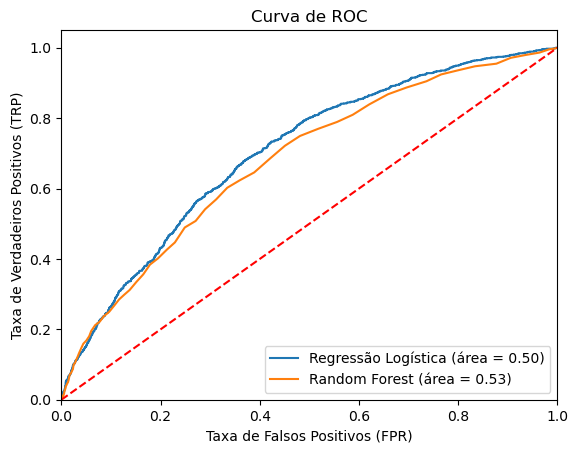

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test,reg_log.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, reg_log.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Regressão Logística (área = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (área = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TRP)')
plt.title('Curva de ROC')
plt.legend(loc="lower right")
plt.show()

A  curva ROC (Receiver Operating Characteristic) é uma ferramenta comumente utilizada para avaliar a performance de modelos de classificação binária. Representa graficamente a relação entre a taxa de verdadeiros positivos (True Positive Rate) e a taxa de falsos positivos (False Positive Rate).


## Importância das Variáveis do Modelo

De acordo com nosso modelo Random Forest, as variáveis mais significativas são:

In [42]:
# Importância das Variáveis
feature_labels = np.array(['V1', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V15',
       'V16', 'V18', 'V19', 'V2_B', 'V2_G', 'V2_M', 'V2_W', 'V12_Ausente',
       'V12_Fiel', 'V12_Inativo', 'V12_Novo', 'V12_Ocasional', 'V13_Ausente',
       'V13_Fiel', 'V13_Inativo', 'V13_Novo', 'V13_Ocasional', 'V14_Ausente',
       'V14_Fiel', 'V14_Inativo', 'V14_Novo', 'V14_Ocasional', 'V17_Ativo',
       'V17_Ausente', 'V17_Basico', 'V17_Conveniencia', 'V17_Economico',
       'V17_Inativo', 'V17_Novo', 'V17_Premium'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

V16-0.00%
V13_Novo-0.08%
V17_Novo-0.09%
V17_Ativo-0.10%
V12_Novo-0.16%
V17_Basico-0.18%
V17_Ausente-0.22%
V12_Ausente-0.23%
V12_Ocasional-0.24%
V17_Economico-0.30%
V13_Ocasional-0.32%
V17_Conveniencia-0.35%
V12_Fiel-0.39%
V13_Ausente-0.40%
V14_Novo-0.40%
V13_Fiel-0.43%
V17_Inativo-0.56%
V12_Inativo-0.63%
V17_Premium-0.67%
V14_Fiel-0.72%
V14_Ocasional-0.73%
V2_W-0.75%
V2_B-0.77%
V14_Ausente-0.78%
V14_Inativo-0.85%
V2_G-0.86%
V13_Inativo-0.86%
V2_M-0.96%
V3-2.40%
V15-2.73%
V4-2.96%
V10-4.34%
V7-4.85%
V5-4.92%
V6-4.93%
V18-5.00%
V8-5.89%
V11-11.48%
V1-11.87%
V9-11.97%
V19-13.62%


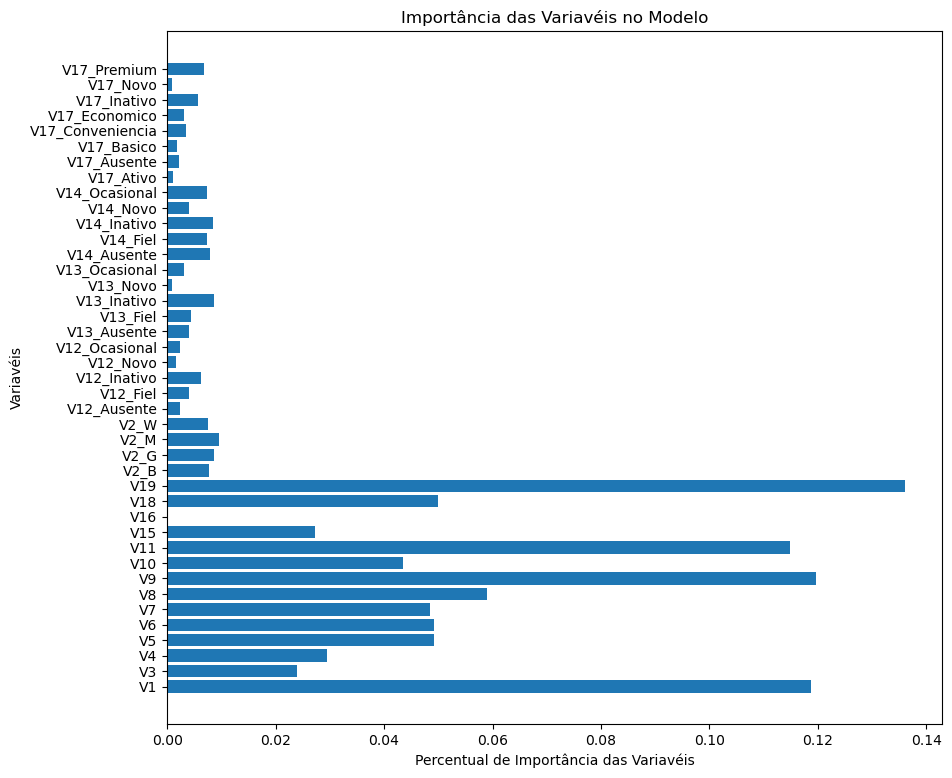

In [43]:
plt.figure(figsize=(10, 9))
plt.barh(range(len(importance)), importance, align='center')
plt.yticks(range(len(importance)), feature_labels)
plt.xlabel('Percentual de Importância das Variavéis')
plt.ylabel('Variavéis')
plt.title('Importância das Variavéis no Modelo')
plt.show()


## Conclusão

A base de dados apresentou uma serie de valores Missing em boa parte das variáveis, inclusive na variável 'target'.
Em relacao ao tratamento de dados, foi possivel perceber um desbalanceamento entre as classes 0 e 1, e isso acaba afetando
o desempenho do modelo. Como forma de minimizar essa questao, utilizou-se a tecnica do SMOTE para balancear as classes de forma
que foi possível melhorar a sua acurácia.
Os modelos testados foram:

1. Regressao Logística
2. Random Forest
3. Gradient Boost

Por ter a maior acuracia optou-se pelo Random Forest. Contudo é importante destacar que ao treinar um modelo de classificação com 
a variável desbalanceada, encontraremos alguns problemas. Isso porque o padrão dos dados para a classe dominante(Classe 0) vai se sobressair em relaçãoaos da classe com menor frequência (Classe 1). Geralmente, nas bases de dados que possuem a variável alvo desbalanceada, é a classe com menor frequência, que foi o objeto desse estudo.

Dessa forma, dado a complexidade do negócio, como alternativa seria obter mais dados para a classificacao do cliente inadimplente como forma de melhorar a performance do nosso modelo.

## FIM